## Preparando o ambiente

Instalando as bibliotecas necessárias

In [1]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Importando as bibliotecas necessárias

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt

Configurando o matplotlib

In [3]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 22})

## Carregando os dados

In [4]:
cancer_df = pd.read_csv('data.csv')

## Conferindo os dados

In [5]:
cancer_df.head()

,id,diagnóstico,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnóstico              569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Podemos ver que temos 33 colunas e a última delas é totalmente nula

## Imprimindo todas as colunas

In [7]:
cancer_df.columns

Index(['id', 'diagnóstico', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Retirando a coluna NaN (Vazia) e configurando id como index (Índice)

In [8]:
# Retirando a coluna
cancer_df.drop(columns=['Unnamed: 32'],inplace=True)

In [9]:
# Setando o id como index
cancer_df.set_index(keys='id',inplace=True)

In [10]:
# Verificando o resultado
cancer_df.head() 

,diagnóstico,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Visualização (Countplot)

Número de casos Benignos: 357 | Número de casos Malignos: 212

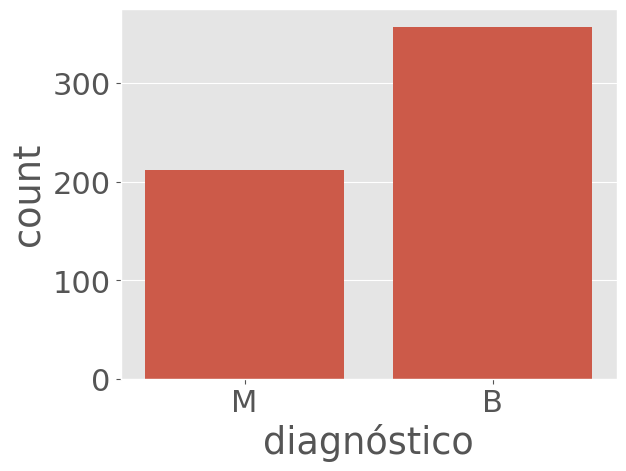

In [11]:
ax = sns.countplot(data = cancer_df,x='diagnóstico') # Esolhendo o gráfico de barras (Contagem)
B, M = cancer_df['diagnóstico'].value_counts() # Contando a quantidade de valores para plotagem
print(f'Número de casos Benignos: {B} | Número de casos Malignos: {M}')

## Visualizando algumas estatísticas

In [12]:
cancer_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Visualização (Violinplot)

Nesta etapa os dados poderão ser visualizados usando uma gráfico de violino. Contudo antes iremos padronizar os recursos para oferecer uma comparação justa. O gráfico de violino nos proporcionará uma forma compacta do perfil do dado a ser analisado. 

No código abaixo será efetuada uma operação de normalização, no qual vou transformar os valores de um datafreme em uma escala pradronizada, com média zero e desvio padrão unitário:
- A primeira operação ```` cancer_df - cancer_df.mean()````, subtrai a média de cada coluna de cada valor do dataframe. Os valores serão deslocados dependendo da média.
- A segunda operação ``` cancer_df - cancer_df.mean()) / (cancer_df.std()```, dividirá os valores pelos desvio padrão. Sendo assim serão redimensionados para que tenham desvio de um.

In [13]:
cancer_df_std = (cancer_df - cancer_df.mean(numeric_only=True)) / (cancer_df.std(numeric_only=True))

Agora retornaremos os valores de diagnostico.

In [14]:
cancer_df_std['diagnóstico'] = cancer_df['diagnóstico']

In [15]:
# Dados já normalizados
cancer_df_std

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,0.983510,2.485391,1.999478,3.280628,1.315704,2.614365,2.530249,0.660239,2.294058,2.650542,...,1.885031,1.567087,-0.213814,1.306537,2.215566,1.147747,2.748204,-2.071512,-0.564768,-1.358098
842517,1.907030,0.741749,1.888827,-0.486643,-0.692317,-0.430066,0.547662,0.259933,1.086129,-0.023825,...,1.804340,-0.826235,-0.604819,-0.375282,0.001391,-0.804742,-0.243675,-0.353322,-0.875473,-0.368879
84300903,1.557513,1.180298,1.455004,1.052000,0.814257,1.081980,2.035440,1.423575,1.953282,1.362280,...,1.510541,0.941382,-0.296744,0.526944,0.938859,0.236827,1.151242,0.455786,-0.779398,-0.023953
84348301,-0.763792,-0.288125,-0.549538,3.399917,2.741868,3.889975,1.450431,1.114027,2.173873,1.914213,...,-0.281217,3.280667,0.689095,3.391291,2.864862,4.728520,6.040726,0.253509,-0.110312,0.133866
84358402,1.824624,1.189310,1.219651,0.538866,-0.048477,-0.313119,1.427237,1.143199,0.728618,1.369806,...,1.297434,0.280125,1.481763,0.220362,-0.009552,-0.360775,-0.867590,-1.150804,-0.789549,-1.465481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,2.341795,2.601897,2.013529,0.218868,0.191637,-0.273077,2.318924,2.065360,1.627719,1.945573,...,1.899514,1.040926,1.085429,0.378033,-0.312314,-1.137415,-1.358963,0.720838,0.070963,0.117596
926682,1.722326,1.290429,1.493644,-0.017817,-0.069697,-0.394473,1.262558,0.807720,0.733182,0.692434,...,1.535369,0.102368,-0.423637,-0.690623,-0.217473,-0.188995,-0.531387,2.083301,2.258951,2.045599
926954,0.577445,0.180539,0.427529,-0.038646,0.660696,0.350427,0.105684,0.611619,0.413705,0.046547,...,0.560868,-0.839745,-0.379008,-0.808876,-0.808406,-0.890632,-1.103578,2.043775,-0.257145,1.373645


In [16]:
# Etapa na qual transforma as colunas em linhas
cancer_df_std_melt = pd.melt(cancer_df_std,id_vars="diagnóstico",
                    var_name="características",
                    value_name='valores')

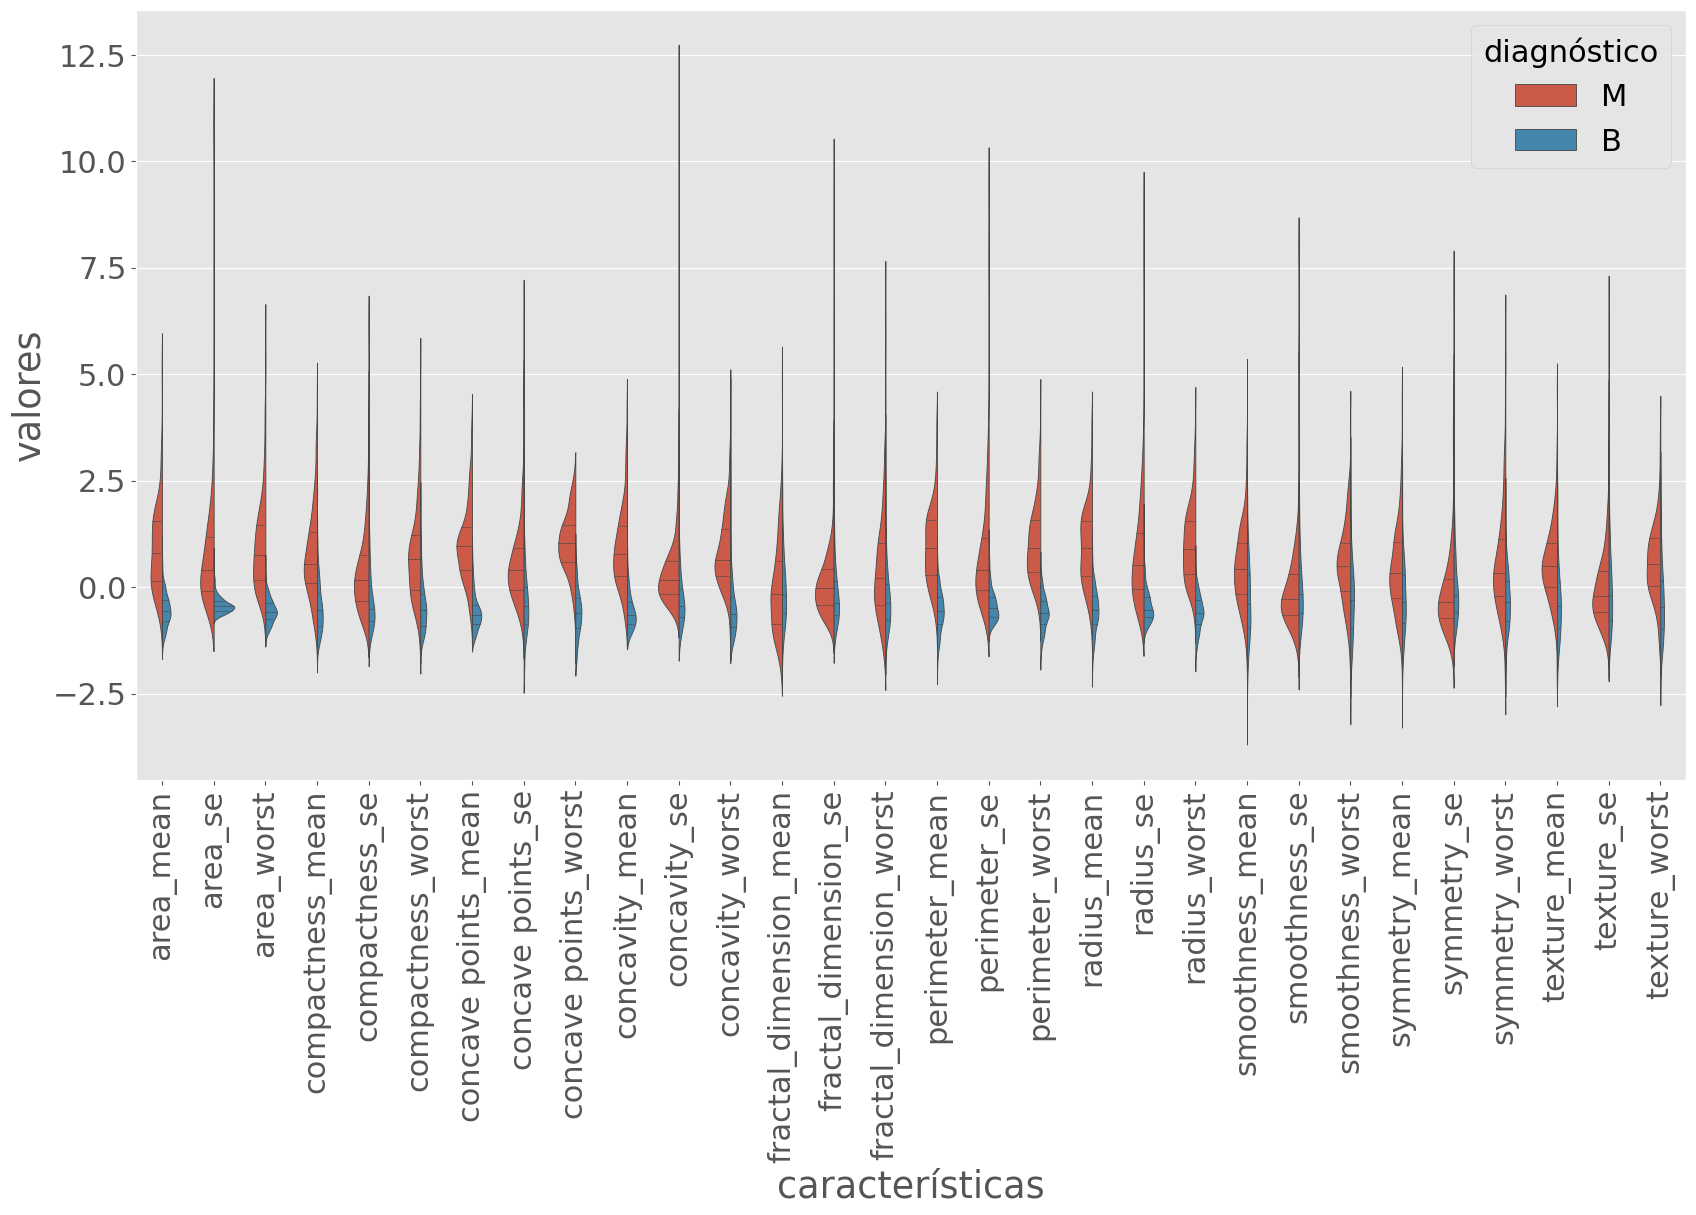

In [17]:
plt.figure(figsize=(20,10))
sns.violinplot(x="características", y="valores", hue="diagnóstico", data=cancer_df_std_melt,split=True, inner="quartile")
configuracao_dos_nomes_x = plt.xticks(rotation=90)

## Visualização (Heatmap)

Nesta etapa estamos providenciando um mapa de calor para enteder se há uam correlação entre os dados fornecidos

Text(0.5, 1.0, 'Recursos de dados do mapa de calor do câncer')

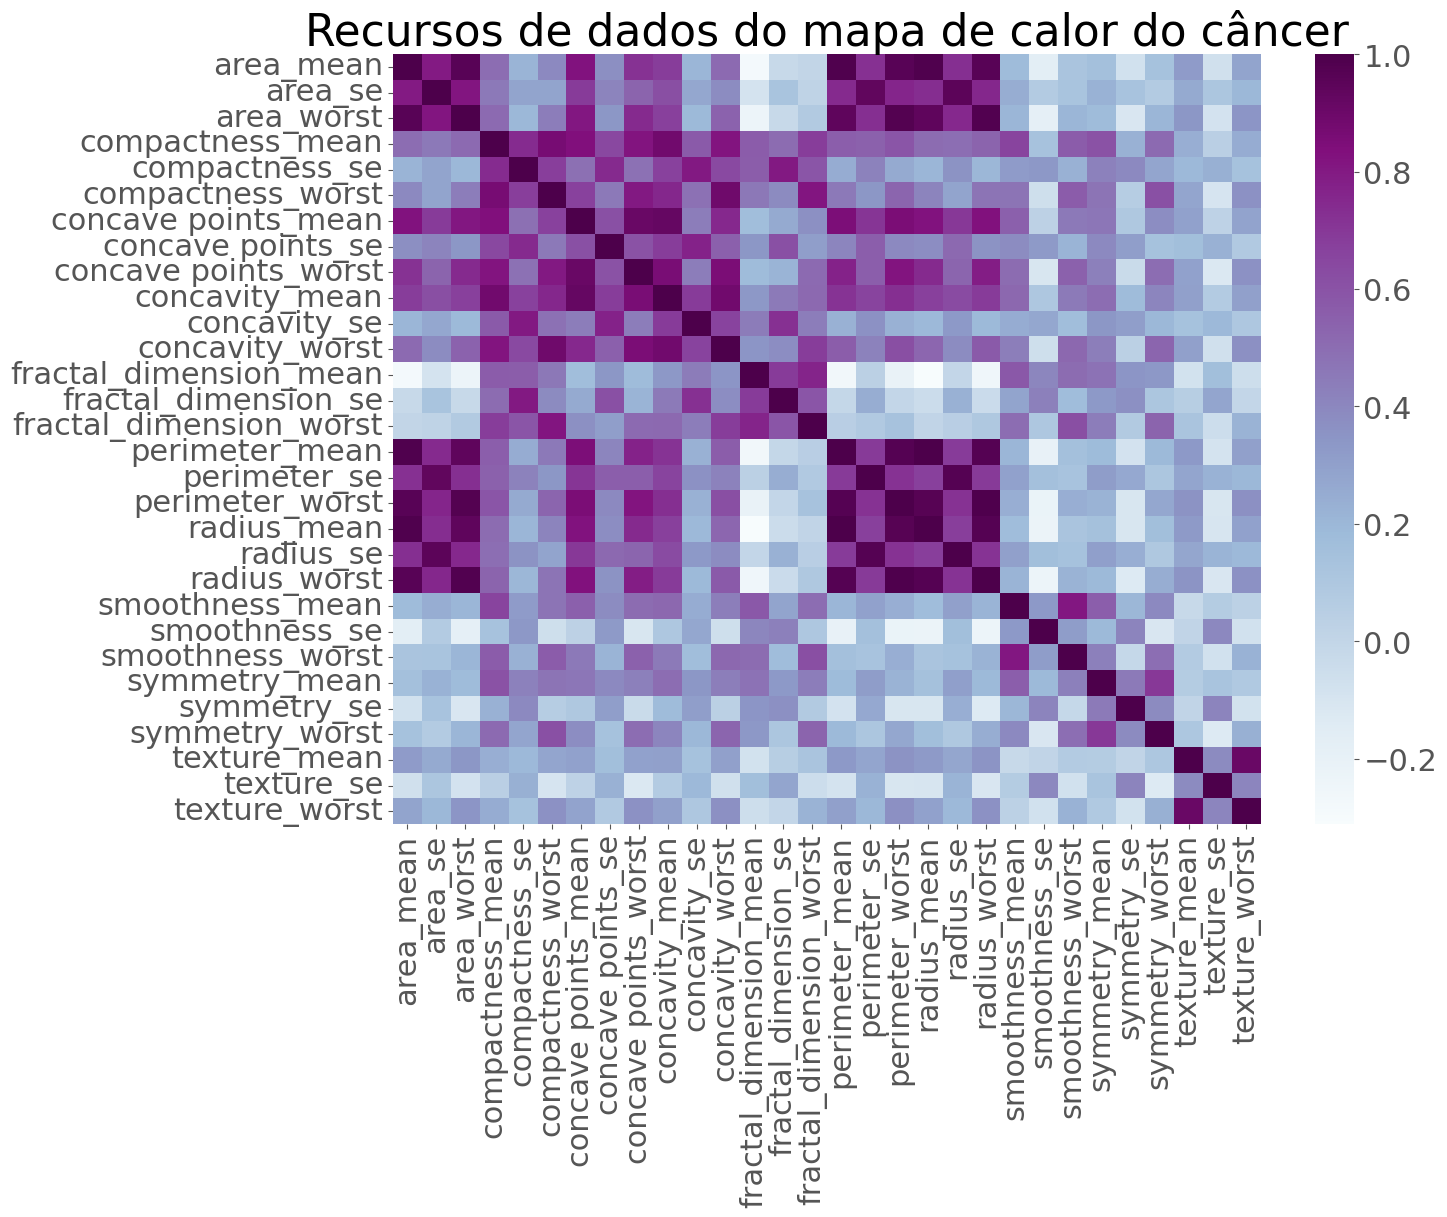

In [18]:
fig = plt.figure(figsize=(14,10)) # Definindo o tamanho da imagem
r = sns.heatmap(cancer_df_std.corr(numeric_only=True),cmap='BuPu',xticklabels=True,yticklabels=True) # Faz um mapa de calor usando a matriz de correlação dos dados já normalizados
r.set_title("Recursos de dados do mapa de calor do câncer")

Com a gráfico acima podemos claramente ver algumas correlações extremas entre **perimeter_se** e **radius_worst**, entre **radius_mean** e **perimeter_worst** que estão destacadas em azul escuro nas entradas fora da diagonal. Assim ao fazer a seleção de recursos, não há problema em remover um desses recursos.

## Implementando o Random forest

In [19]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [21]:
x = cancer_df_std.drop(columns = ['diagnóstico']) # Dados de Treino -> Retiramos a coluna diagnosis, pois será a coluna que o algoritmo vai preencher com a classificação
y = cancer_df_std['diagnóstico'] # Dados Originais para comparar depois do treino

In [22]:
# Dividiremos os dados em uma proporção 70/30 -> 70% de treino e 30% teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) # função que dividirá os dados (aleatoriamente)

In [23]:
# random forest classifier with n_estimators=100 (default) -> Número de arvores da floresta
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

Accuracy is:  0.9707602339181286


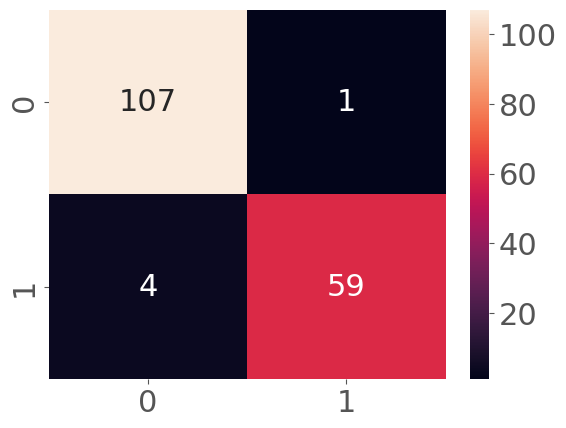

In [24]:
ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

**Neste ponto, tentaremos limitar nossos dados para melhorar a predição**
1. A precisão é de aproximadamente 97%. Nota-se que Compactness_mean, concavity_mean e concave points_mean estão correlacionados entre si. Portanto, escolheremos concavity_mean.
2. Além disso, radius_se, perimeter_se e area_se estão correlacionados, portanto usemos area_se.
3. O radius_worst, perimeter_worst e area_worst estão correlacionados, escolheremos area_worst.
4. Compactness_worst, concavity_worst e concave points_worst, podemos usar concavity_worst.
5. Compactness_se, concavity_se e concave points_se também estão correlacionados. Portanto, usamos concavity_se.
6. Texture_mean e Texture_worst estão correlacionados, decidimos usar Texture_mean
7. area_worst e area_mean estão correlacionados, escolhemos area_mean

In [25]:
# Retirando colunas não necessárias
features_to_drop = ['perimeter_mean','radius_mean','compactness_mean', 'concave points_mean','radius_se','perimeter_se', 'radius_worst', 'perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se',
'texture_worst','area_worst']
cancer_df_std_reduced = cancer_df_std.drop(features_to_drop,axis = 1 )

In [26]:
# Retirando a coluna de diagnóstico
x2 = cancer_df_std_reduced.drop(columns = ['diagnóstico'])
y2 = cancer_df_std_reduced['diagnosis']

KeyError: 'diagnosis'

In [ ]:
# Divisão de dados para teste
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=42)

NameError: name 'y2' is not defined

In [ ]:
# random forest classifier with n_estimators=100 (default)
clf_rf_2 = RandomForestClassifier(random_state=43)      
clr_rf_2 = clf_rf_2.fit(x_train2,y_train2)

Accuracy is:  0.9766081871345029


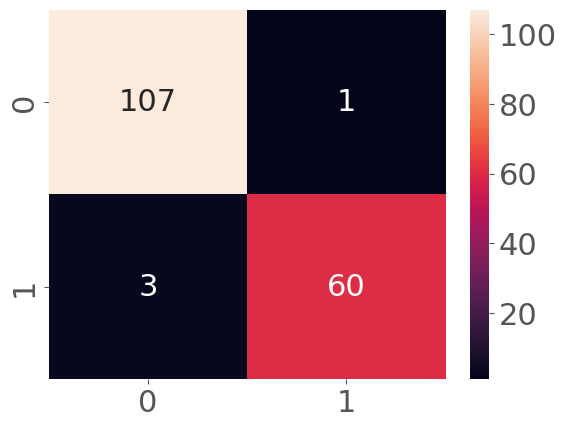

In [ ]:
ac = accuracy_score(y_test2,clf_rf_2.predict(x_test2))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test2,clf_rf_2.predict(x_test2))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

Com isso percebemos que a precisão melhorou um pouco. Contudo ainda pode ser melhorado, usando a eliminação recursiva de recursos (RFE) com a random forest. Ele usa a RFC, atribuindo pesos a cada uma das informações. As informações com pesos absolutos são removidos do conjunto atual de recursos. O procedsimento é repetido de forma recursiva no conjunto até que o número desejado de recursos seja alcançado. Assim escolheremos as 5 mais importantes informações.

In [ ]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['area_worst', 'concave points_mean', 'concave points_worst',
       'perimeter_worst', 'radius_worst'],
      dtype='object')


In [ ]:
# Usaremos somente esses 5 dados para treinar o random forest
xtrain_5features = x_train[x_train.columns[rfe.support_]]
x_test_5features = x_test[x_train.columns[rfe.support_]]

In [ ]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(xtrain_5features,y_train)

Accuracy is:  0.9649122807017544


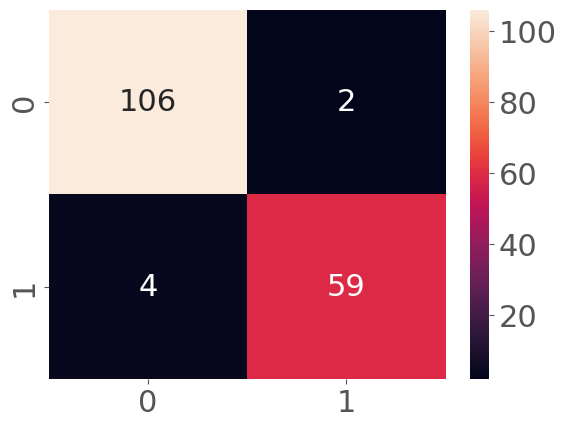

In [ ]:
ac = accuracy_score(y_test,clf_rf.predict(x_test_5features))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test_5features))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

Ah bem! Precisão diminuiu! Mas ei, este é o conjunto de dados real e não vou dizer que tudo são arco-íris no aprendizado de máquina. Se selecionar apenas alguns recursos diminui a precisão, então não deveríamos selecionar alguns recursos, a menos que pretendamos acelerar a previsão. Às vezes, se uma diminuição de 2% na precisão traz a vantagem de fazer previsões em um ritmo mais rápido, digamos, dez vezes mais rápido, então ainda pode ser desejável fazer a seleção de recursos.

Vamos fazer outra tentativa de eliminação de recursos recursivos com validação cruzada usando RFC.

In [ ]:
from sklearn.feature_selection import RFECV
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 15
Best features : Index(['area_mean', 'area_worst', 'compactness_worst', 'concave points_mean',
       'concave points_worst', 'concavity_mean', 'concavity_worst',
       'perimeter_mean', 'perimeter_worst', 'radius_mean', 'radius_se',
       'radius_worst', 'symmetry_worst', 'texture_mean', 'texture_worst'],
      dtype='object')
